In [1]:
import numpy as np
import os
import json
import pycpd
from matplotlib import pyplot as plt

In [2]:
def extract_annotation(data):
    for item in data:
        if 'classification' in item['properties']:
            if item['properties']['classification']['name'] == 'Region*':
                annotation_list = []
                for sublist in item['geometry']['coordinates']:
                    for sublist2 in sublist:
                        for point in sublist2:
                            annotation_list.append(point)
                return np.array(annotation_list)

In [3]:
file_path_anno = ['Annotationen/Annotation-C.json', 
                  'Annotationen/Annotation-D.json',
                  'Annotationen/Annotation-E.json',
                  'Annotationen/Annotation-F.json',
                  'Annotationen/Annotation-G.json',
                  'Annotationen/Annotation-H.json']

annotation = []

for path in file_path_anno:
    with open(path) as f:
        data = json.load(f)
        annotation.append(extract_annotation(data))

In [4]:
def plot_annotation(annotation):
    x_anno = annotation[:,0]
    y_anno = annotation[:,1]
    plt.scatter(x_anno,y_anno) 

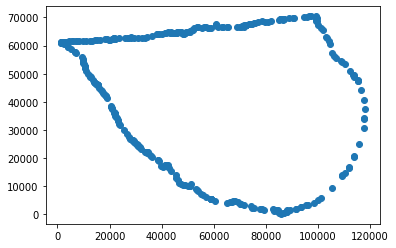

In [5]:
# Annotation C
plot_annotation(annotation[0])

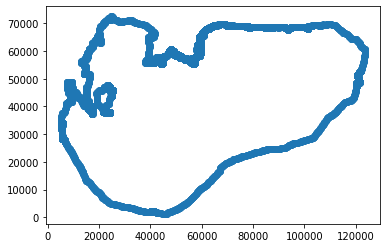

In [6]:
# Annotation D
plot_annotation(annotation[1])

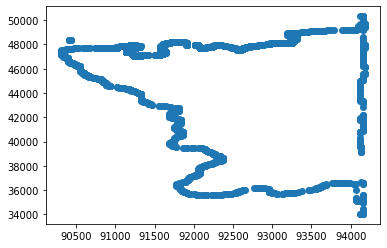

In [7]:
# Annotation E
plot_annotation(annotation[2])

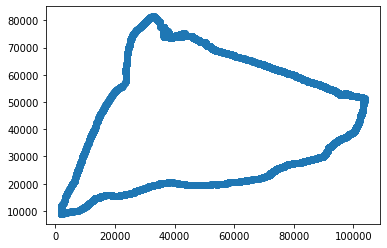

In [8]:
# Annotation F
plot_annotation(annotation[3])

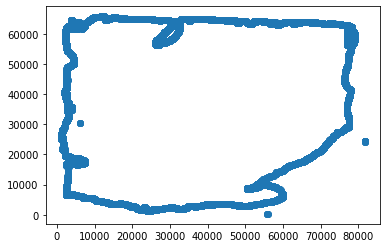

In [9]:
# Annotation G
plot_annotation(annotation[4])

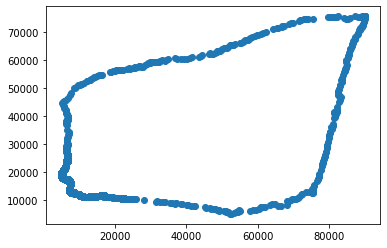

In [10]:
# Annotation H
plot_annotation(annotation[5])

In [11]:
file_path_cut = ['Annotationen/Schnitt-C.obj', 
                 'Annotationen/Schnitt-D.obj',
                 'Annotationen/Schnitt-E.obj',
                 'Annotationen/Schnitt-F.obj',
                 'Annotationen/Schnitt-G.obj',
                 'Annotationen/Schnitt-H.obj']
cuts = []

for path in file_path_cut:
    with open(path) as f:
        readlines = f.readlines()
    l = []
    for line in readlines:
        if line.startswith('l '):
            lines = line.split(' ')
            if lines[1] not in l:
                l.append(int(lines[1]))
            if lines[2] not in l:
                l.append(int(lines[2]))
    cuts.append(l)

In [12]:
def plot_cut(cut):
    x_cut = []
    y_cut = []
    for index in cut:
        splitted = readlines[index].split(' ')
        x_cut.append(float(splitted[3])-1)
        y_cut.append(float(splitted[1])-1)
    plt.scatter(x_cut, y_cut)

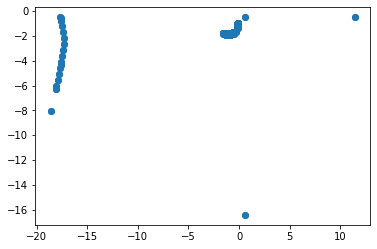

In [13]:
# Schnitt C
plot_cut(cuts[0])
# !!! falscher Plot, but in ln[11] oder ln[12], andere Plots sind auch falsch

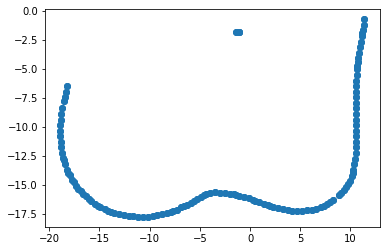

In [14]:
# Schnitt D
plot_cut(cuts[1])

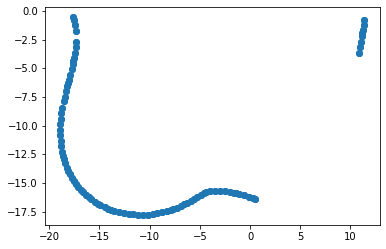

In [15]:
# Schnitt E
plot_cut(cuts[2])

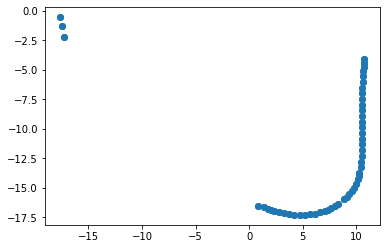

In [16]:
# Schnitt F
plot_cut(cuts[3])

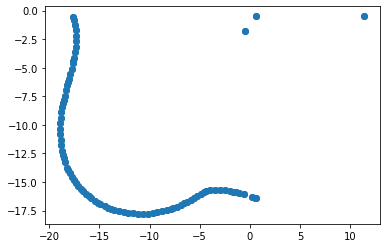

In [17]:
# Schnitt G
plot_cut(cuts[4])

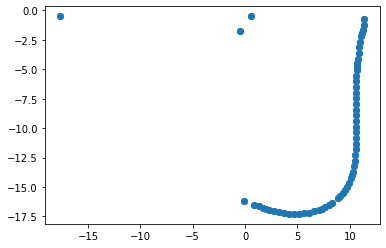

In [18]:
# Schnitt H
plot_cut(cuts[5])

In [19]:
# Vorregestrierung

# https://medium.com/@olga_kravchenko/generalized-procrustes-analysis-with-python-numpy-c571e8e8a421
# *gemeinsamen Nullpunkt finden
# *Abstände zum Nullpunkt normalisieren

# *Upsampling - # Interpolation für mehr Punkte

In [20]:
# Point Drift Registrierung

In [21]:
# Für Datei D, Rotation und Ausrichtung richtig. Für andere Dateien problematisch, Lösung suchen

In [22]:
# Programm bereinigen, Abgabefertig machen